## Complex Numbers
In this notebook, we'll go through some of the basics of complex numbers. I know this may seem somehat unrelated to audio, but soon enough you'll see and hear how critical complex numbers are for audio representation. They in fact make our lives much simpler. 

In [ ]:
# Starting once again with the imports.
%pip install ipympl
import numpy as np 
from  matplotlib import patches
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
from ipywidgets import * # interactive plots
import IPython
from IPython.display import Audio, Image
%matplotlib ipympl


## Working with complex numbers in python

Let's recall our general representation of a complex number, $z$:

\begin{equation}
z = a + jb
\end{equation}

which consists some number $a$ and another number $b$, which is multiplied by the complex variable $j$ which is defined as $j = \sqrt{-1}$. We give specific names to these two parts of the complex number: (i) the real part denoted by $a$, and (ii) the imaginary part denoted by $b$. (Note that the imaginary part of the complex number is just $b$ not $jb$!). 

So for instance, a complex number, $z = 3 + j4$ has a real part of 3 and an imaginary part of 4. At first sight, this all seems very abstract, but let's play around with them in this notebook to get a better sense of how to work with them and what they actually mean. In due time, you will come to realize that complex numbers are a fundamental in representing, analyzing, or processing audio. But we will have to be patient as we need to get the basics first!

Okay, well first of all, how do we represent complex numbers in python? It's pretty straightforward, we simply assign it to a variable. Python recognizes "j" as the complex variable, so we just write complex numbers as we do on paper. See the code below and try to write your own numbers. A few things to note:

- We do not need to use the multiplication operator to multiply the imaginary part by $j$. In fact if you do this, then python will interpret $j$ as a variable and not $\sqrt{-1}$. 

- You need to explicitly write the value of the imaginary part if it is 1. Try for instance to write the complex number 4 + j and see what happens. 

- When a complex number is defined, it has attributes that allows you to easily get the real part, imaginary part, complex conjugate, etc. 


In [3]:
z = 30 - 1j  # Write your complex number here

# Have a look at the commands below to see how the real and imaginary parts are extracted:

print("The data type of z is ",type(z))
print("The complex number is ",z)
print("The real part is ",z.real)
print("The imaginary part is ",z.imag)
print("The complex conjugate is ",z.conjugate()) # here you can also you np.conj(z) (from numpy library)


The data type of z is  <class 'complex'>
The complex number is  (30-1j)
The real part is  30.0
The imaginary part is  -1.0
The complex conjugate is  (30+1j)


## Arithmetic with complex numbers

We can also define rules of arithmetic, i.e. for addition, subtraction, multiplication, and division with complex numbers. The key detail is that we need to treat the real and imaginary parts separately in addition and subtraction, and keep an eye on the fact that $j = \sqrt{-1} \rightarrow j^{2} = -1$. In python, once a complex number is defined, the same operators used as for real numbers can also be used. We'll see how this works, but first, let's recall the rules.

### Addition and subtraction

\begin{align}
z_{1} + z_{2} &= (a + jb) + (c + jd) = (a+c) + j(b+d) \nonumber \\
\\
z_{1} - z_{2} &= (a + jb) - (c + jd) = (a-c) + j(b-d)
\end{align}


### Multiplication

Recall that $j^{2} = -1$! 

\begin{align}
z_{1} \cdot z_{2} &= (a + jb) \cdot (c + jd) \nonumber \\
                  &= a(c + jd) + jb(c+jd) \nonumber \\
                  & = ac + jad + jbc + bdj^{2}  \nonumber \\
                  & = (ac - bd) + j(ad + bc)
\end{align}


### Division

For this we need to make use of the complex conjugate (we'll talk more about this in a bit!) to simplify the denominator. We essentially multiply the expression by 1 (so we don't change it), but it is a ratio of the complex conjugate of the denominator with itself so that we can get rid of the $j$ terms in the denominator. It's sort of the same thing we do when dividing by square roots. Again be very careful with that $j^{2} = -1$!

\begin{align}
\frac{z_{1}}{z_{2}} &= \frac{(a + jb)}{(c + jd)} \nonumber \\
                    \\
                  &= \frac{(a + jb)}{(c + jd)} \cdot \frac{(c - jd)}{(c - jd)} \nonumber \\
                  \\
                  & = \frac{(ac + bd) + j(bc - ad)}{(c^{2} + d^{2})}  \nonumber \\
                  \\
                  & = \frac{(ac + bd)}{(c^{2} + d^{2})} + j\frac{(bc - ad)}{(c^{2} + d^{2})} 
\end{align}



## Plotting complex numbers 

### Complex Plane

So we know how to plot real numbers on a line but what about complex numbers? How do we visually represent them?
Well since we have two distinct parts of the number, real and imaginary, we will have to represent the real part on one number line and the imaginary part on another number line. This constitutes what we refer to as the **complex plane**. In the complex plane, we can essentially represent complex numbers as points on that plane. In the same way we can represent a point (x,y) on the x and y axis, we can also represent (real, imag) on the complex plane. Let's plot an example to see what we mean. 





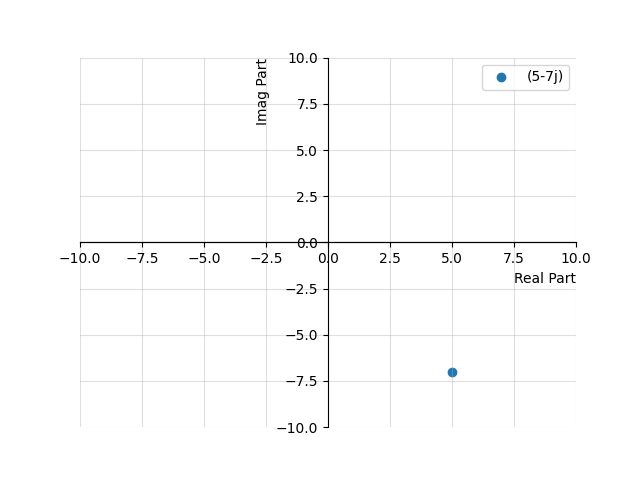

In [4]:
# Plotting a complex number in the complex plane

z = 5 - 7j # define your complex number (change this value and re-run the cell to see how the point changes on the plot)

fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.scatter(z.real, z.imag,label=z) # this command makes a scatter plot of x and y values
ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')
ax.legend()

# These commands are just decorations on the plot
ax.set_xlim([-10, 10]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-10, 10])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')



### Vector representation

We can also think of complex numbers as a $2 \times 1$ column vector where the entries correspond to the real and imaginary part. For instance , for a complex number, $z = 2 + j7$, this can be represented as a vector $\begin{bmatrix} 2 \\ 7 \end{bmatrix}$.

And hence we can think about this as a vector in the complex plane as follows.


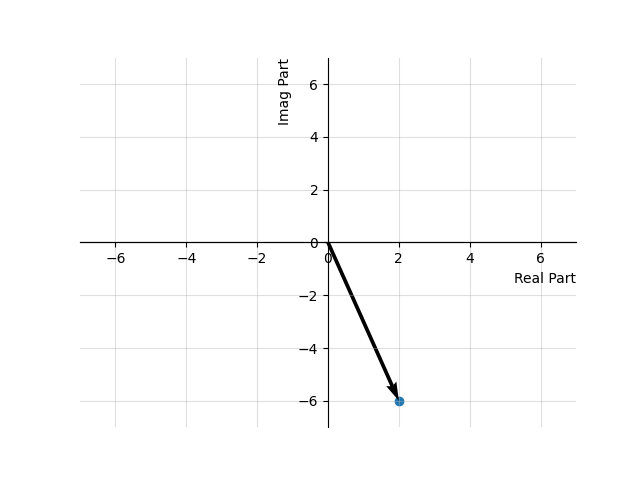

In [5]:
z = 2 - 6j # define your complex number (change this value and re-run the cell to see how the point changes on the plot)

fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.scatter(z.real, z.imag,label=z) # this command makes a scatter plot of x and y values
ax.quiver(z.real, z.imag, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')
# ax.legend()

# These commands are just decorations on the plot
ax.set_xlim([-7, 7]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-7, 7])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')


### Revisiting addition 

As we have seen that complex numbers can be represented as vectors on the complex plane, this in fact gives us a new interpretation of how complex numbers are added. It is simply the sum of two vectors. Recall our summation rule 

\begin{align}
z_{1} + z_{2} &= (a + jb) + (c + jd) = (a+c) + j(b+d)
\end{align}

Using our vector representation, we could alternatively express this as 

\begin{equation}
\begin{bmatrix} a \\ b \end{bmatrix} + \begin{bmatrix} c \\ d \end{bmatrix} = \begin{bmatrix} a + c \\ b + d \end{bmatrix}
\end{equation}

which is [vector addition](https://www.youtube.com/watch?v=8QihetGj3pg). 

Let's see this graphically. In the figure below, each of the vectors representing each of the complex numbers has by default its starting point as the origin. However the origin is in fact an arbitray choice as the vector itself represents a fixed translation along the real axis and a fixed translation along the imaginary axis starting from any point in the complex plane. These vectors are therefore also shown in a lighter colour as starting from the end point of one of the other vectors (think about this). For instance, let's look at the orange vector starting from the origin. The complex number $z_{1}$ tells us move along the real axis by 4 units and along the imaginary axis by 6 units, which is where the arrow ends. From this point on the complex plane, we can then "add" $z_{2}$ by 3 units on the real axis and -5 units on the imaginary axis, which is represented by the lighter green vector. The point at which this arrow ends up is now in fact the sum of the two vectors which is represented by the black arrow. 

Starting $z_{2}$ instead, reason for yourself why this vector addition makes sense. Also try different complex numbers for $z_{1}$ and $z_{2}$ to see how things change. We'll look at a graphical view of multiplication and division later on.


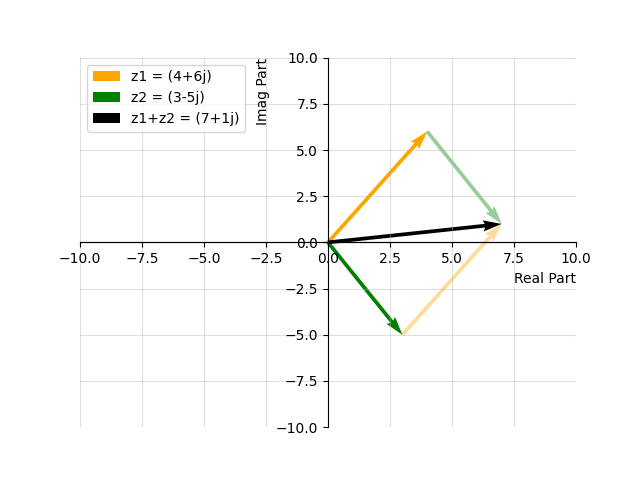

In [6]:
# Define your complex numbers
z1 = 4 + 6j 
z2 = 3 - 5j
z_sum = z1+z2


fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
# ax.scatter(z1.real, z1.imag,label=z) # this command makes a scatter plot of x and y values
ax.quiver(z1.real, z1.imag, angles='xy', scale_units='xy',scale=1, label='z1 = '+str(z1),color='orange') # 1st vector
ax.quiver(z2.real, z2.imag, z1.real, z1.imag, angles='xy', scale_units='xy',scale=1,color='orange',alpha=0.4) # 1st vector (translated to show vector addition)

ax.quiver(z2.real, z2.imag, angles='xy', scale_units='xy',scale=1, label='z2 = '+str(z2), color='green') # second vector
ax.quiver(z1.real, z1.imag, z2.real, z2.imag, angles='xy', scale_units='xy',scale=1, color='green', alpha=0.4) # second vector

ax.quiver(z_sum.real, z_sum.imag, angles='xy', scale_units='xy',scale=1, label='z1+z2 = '+str(z_sum)) # sum
ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')
ax.legend()

# These commands are just decorations on the plot
ax.set_xlim([-10, 10]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-10, 10])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')

## Modulus, Argument, Complex conjugate

Now that we have a graphical interpretation of a complex number, there are a few other properties of complex numbers that are a bit easier to define, namely the modulus, argument, and complex conjugate.

### Modulus

The modulus of a complex number can be thought of the length of the vector it represents in the complex plane. For a complex number, $z = a +jb$, its modulus, denoted as $|z|$, is defined as

\begin{align}
|z| &= \sqrt{\Re{\{z\}}^{2} + \Im{\{z\}}^{2}} \nonumber \\
    &= \sqrt{a^{2} + b^{2}}
\end{align}

where $\Re{\{z\}}$ denotes the real part of $z$ and $\Im{\{z\}}$ denotes the imaginary part of $z$. 


### Argument

The argument of a complex number is defined as the angle between the real-axis (in the positive direction) and the vector representing the complex number. There are a number of notations for the argument of a complex number, such as $\angle{z}$, $\arg{(z)}$ or sometimes simply $\theta$, and is defined as

\begin{align}
\angle{z} = \arg{(z)} = \theta &= \arctan \left( \frac{\Im{\{z\}}}{\Re{\{z\}}} \right)   \nonumber \\
    &= \arctan \left( \frac{b}{a} \right) 
\end{align}

### Complex conjugate

The complex conjugate of a complex number,$z$, is another complex number which has an identical real part but the opposite sign for the imaginary part. In terms of our graphical representation, the complex conjugate is another vector with the same length as $z$ but reflected across the real axes. The complex conjugate of $z$ is denoted as $z^{*}$ and is defined as 

\begin{align}
\text{for a complex number } z &= a + jb, \text{its complex conjugate}, z^{*} =  a -jb
\end{align}

### Graphical understanding
Let's have a look at these properties graphically to get a better understanding of them.

The modulus, |z| is  2.23606797749979 (length of vector)
The argument, arg(z) is  2.0344439357957027 (angle in radians between the vector and the positive real axis)
z =  (-5+4j)
z* =  (-5-4j)


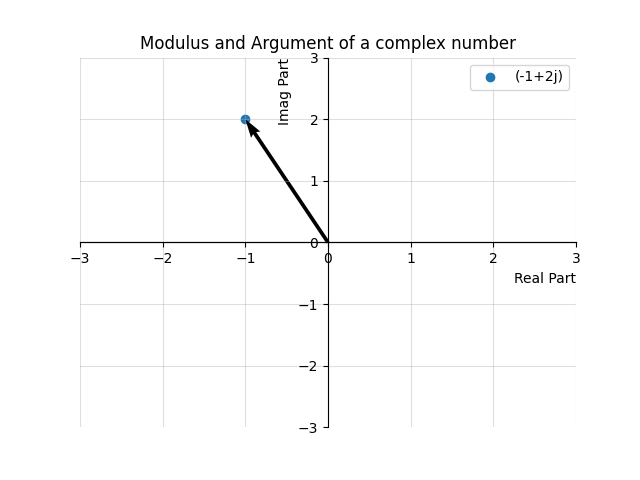

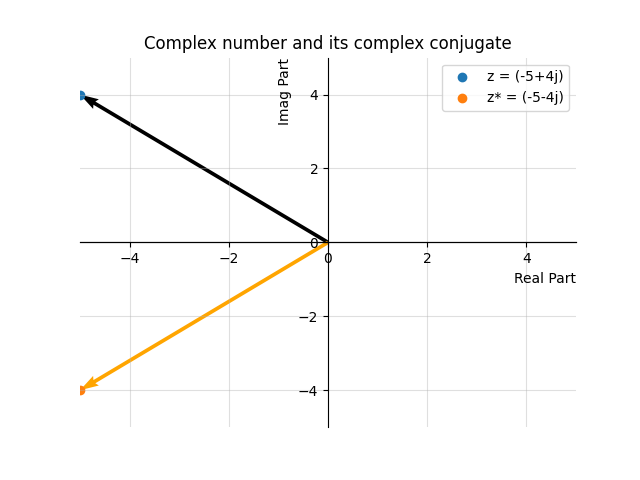

In [7]:
# MODULUS AND ARGUMENT

z = -1 + 2j # define your complex number (change this value and re-run the cell to see how the point changes on the plot)

z_mod = np.abs(z) # this is a function to compute the modulus, but you will try to program it on your own!
z_arg = np.angle(z)%(2*np.pi) # this is a function to compute the argument, but you will try to program it on your own!

print("The modulus, |z| is ",z_mod, "(length of vector)")
print("The argument, arg(z) is ",z_arg, "(angle in radians between the vector and the positive real axis)")

fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.scatter(z.real, z.imag,label=z) # this command makes a scatter plot of x and y values
ax.quiver(z.real, z.imag, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
# am1 = AngleAnnotation((0.0,0.0), [0,0], [z.real,z.imag], ax=ax, size=130, text="arg(z) = "+str(np.round(z_arg, decimals=2))+" rad", textposition = "inside", text_kw=dict(fontsize=10, xytext = (40,-5)))
# ax.text(z.real, z.imag, "|z| = "+str(np.round(z_mod,decimals=2)), fontsize=12, rotation=(z_arg*(180/np.pi)),position=(z.real,z.imag))

ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')
ax.set_title('Modulus and Argument of a complex number')
ax.legend()

# These commands are just decorations on the plot 
ax.set_xlim([-3, 3]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-3, 3])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')


# COMPLEX CONJUGATE
# Let's plot a complex number and its complex conjugate

z2 = -5 + 4j
z2_conj = np.conjugate(z2) # this is another function to compute the complex conjugate
print("z = ",z2)
print("z* = ", z2_conj)


fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.quiver(z2.real, z2.imag, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.quiver(z2_conj.real, z2_conj.imag, angles='xy', scale_units='xy',scale=1, color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.scatter(z2.real, z2.imag,label="z = "+str(z2)) # this command makes a scatter plot of x and y values
ax.scatter(z2_conj.real, z2_conj.imag,label="z* = "+str(z2_conj)) # this command makes a scatter plot of x and y values

ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')
ax.set_title('Complex number and its complex conjugate')
ax.legend()

# These commands are just decorations on the plot 
ax.set_xlim([-5, 5]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-5, 5])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')


## Polar Form of complex numbers

Having understood the modulus and argument of a complex number, we are in the perfect position to express complex numbers in a particular form called its **polar form**. The previous $z = a + jb$ is referred to as the standard form, but we can express a complex number as well in its polar form as follows

\begin{align}
z = r \left(\cos(\theta) + \sin(\theta) \right)
\end{align}

where we denote $r$ as the modulus of $z$, i.e. $r = |z|$, and $\theta$ is the argument of $z$. 

You are probably thinking - why can we do this? Well, we again go back to our geometric or graphical representation of complex numbers. The vector that represents the complex number can actually be decomposed into two other vector - one that lives on the real axis and the other on the imaginary axis. In other words, for a complex number, $z = a + jb$, in vector form, we can do the following:

\begin{equation}
\begin{bmatrix} a \\ b  \end{bmatrix} = \underbrace{\begin{bmatrix} a \\ 0  \end{bmatrix}}_{\text{vector on real axis}} + \underbrace{\begin{bmatrix} 0 \\ b  \end{bmatrix}}_{\text{vector on imaginary axis}}
\end{equation}

Let's visualize this.

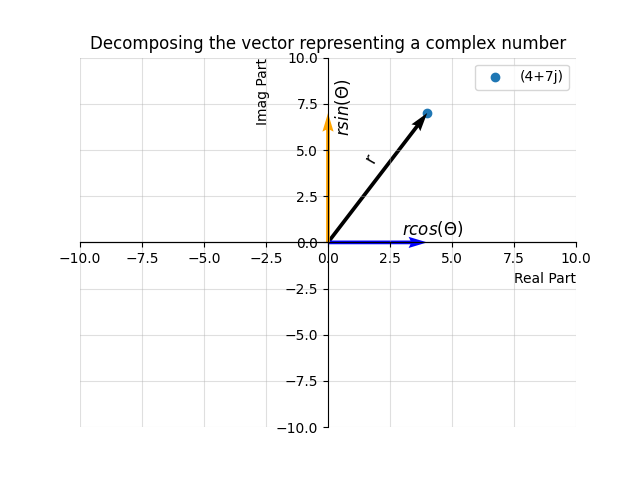

In [8]:
z = 4 + 7j 
z_mod = np.abs(z) 
z_arg = np.angle(z)%(2*np.pi) 

fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.scatter(z.real, z.imag,label=z) # this command makes a scatter plot of x and y values
ax.quiver(z.real, z.imag, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.quiver(z.real, 0, angles='xy', scale_units='xy',scale=1,color='blue') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.quiver(0, z.imag, angles='xy', scale_units='xy',scale=1,color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
# am1 = AngleAnnotation((0.0,0.0), [0,0], [z.real,z.imag], ax=ax, size=130, text="$\Theta$", textposition = "inside", text_kw=dict(fontsize=10, xytext = (0,-5)))
ax.text(z.real, z.imag, "r", fontsize=12, rotation=(z_arg*(180/np.pi)),position=(z.real/3,z.imag/1.6))
ax.text(z.real, 0, "$r cos(\Theta)$", fontsize=12,position=(z.real-1,0.4))
ax.text(0, z.imag, "$r sin(\Theta)$", fontsize=12,rotation = 90, position=(0.2,z.imag-1))



ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')
ax.set_title('Decomposing the vector representing a complex number')
ax.legend()

# These commands are just decorations on the plot 
ax.set_xlim([-10, 10]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-10, 10])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')


So we can see that the vector on the real axis is indeed $\begin{bmatrix} a \\ 0  \end{bmatrix}$ and that on the imaginary axis is $\begin{bmatrix} 0 \\ b  \end{bmatrix}$. So how does this relate to the polar form?

Well, we need to recall some trigonometry. What is the length of the decomposed vectors on the real axis and the imaginary axis? It's simply $a$ and $b$ respectively, right? We can also observe that the vector of the complex number, along with these decomposed vectors forms a right-angled triangle, from which we can deduce that


\begin{align}
\cos \theta &= \frac{a}{r} \rightarrow a = r \cos \theta \nonumber \\
\sin \theta &= \frac{b}{r} \rightarrow b = r \sin \theta \nonumber \\
\end{align}

and we can verify the length of the vector (i.e. the modulus of the complex number) is

\begin{align}
\sqrt { (r \cos(\theta))^{2} + (r \sin(\theta))^{2}}  &= \sqrt { r^{2} (\cos^{2}(\theta) + \sin^{2}(\theta) )} \nonumber \\
  & = \sqrt{r^{2}} \nonumber \\
  & = r
\end{align}


Hence, replacing $a$ and $b$ in our standard form of $z = a +jb$ then yields the polar form

\begin{align}
z = r \left(\cos(\theta) + \sin(\theta) \right)
\end{align}

where $r$ is the modulus of the complex number and $\theta$ is its argument.



## Exponential form of complex numbers

### Euler's identity

Yet another useful, and arguably the most useful representation of complex numbers is its **exponential form**, which stems from [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula) which is given by

\begin{equation}
e^{j\theta} = \cos \theta + j \sin \theta
\end{equation}

where $e$ is the exponential function. In words, this equation says that the exponential of a complex number, $j \theta$ is another complex number with a real part $\cos \theta$ and imaginary part $\sin \theta$, i.e. a complex number in polar form with a modulus of 1 and an argument $\theta$. As you may already expect, this equation has a beautiful geometric interpretation. It corresponds to complex numbers on the [unit circle](https://en.wikipedia.org/wiki/Unit_circle) in the complex plane, i.e. a circle of radius 1 (since the modulus is 1).

Let's check this out! 




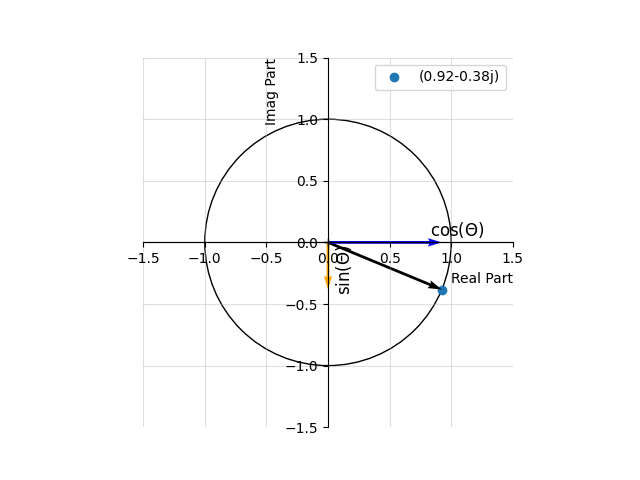

In [9]:
theta = -np.pi/8 # Change the value of theta and re-run the cell to see where the complex number ends up
z = np.exp(1j*theta) # np.exp is the exponential function

# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none") # This is for plotting the unit circle


fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis

ax.add_patch(UnitCircle) 
ax.plot(xO,yO,'k+')
ax.set_aspect('equal')

ax.scatter(z.real, z.imag,label=np.round(z,decimals=2)) # this command makes a scatter plot of x and y values
ax.quiver(z.real, z.imag, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.quiver(z.real, 0, angles='xy', scale_units='xy',scale=1,color='blue') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.quiver(0, z.imag, angles='xy', scale_units='xy',scale=1,color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
# am1 = AngleAnnotation((0.0,0.0), [0,0], [z.real,z.imag], ax=ax, size=130, text="$\Theta$", textposition = "inside", text_kw=dict(fontsize=10, xytext = (0,-5)))
# ax.text(z.real, z.imag, "r", fontsize=12, rotation=(z_arg*(180/np.pi)),position=(z.real/3,z.imag/1.6))
ax.text(z.real, 0, "$ \cos(\Theta)$", fontsize=12,position=(z.real-0.1,0.05))
ax.text(0, z.imag, "$ \sin(\Theta)$", fontsize=12,rotation = 90, position=(0.05,z.imag-0.01))



ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')
ax.set_title(' ')
ax.legend()

# These commands are just decorations on the plot 
ax.set_xlim([-1.5, 1.5]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-1.5, 1.5])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')

### General exponential form

But remember in general, we do have some modulus (length) of our complex number and we need to incorporate this. But it is quite simple! We simply need to multiply the previous exponential form by the modulus! We can see why this is the case because using Euler's identity, it will then exactly be equivalent to the polar form. The general exponential form of the complex number is therefore $r e^{j\theta}$

\begin{equation}
r e^{j\theta} = r (\cos \theta + j \sin \theta)
\end{equation}

where $r$ is the modulus of the complex number.

So now we can in fact see all the different forms of our complex number

| standard form |             polar form            | exponential form |
|:-------------:|:---------------------------------:|:----------------:|
|     a + jb    | r ($\cos \theta$ + j $\sin(\theta)$) |  $r e^{j\theta}$ |          |


### Arithmetic operations

It turns out that multiplication and division in particular become a bit easier with complex numbers expressed in the exponential form. Consider two complex numbers, $z_{1} = r_{1} e^{j\theta_{1}}$ and $z_{2} = r_{2} e^{j\theta_{2}}$, then multiplication and division is defined as

\begin{align}
z_{1} z_{2} &= r_{1}r_{2}  e^{j(\theta_{1} + \theta_{2})} \nonumber \\
\\
\frac{z_{1}}{z_{2}} &= \frac{r_{1}}{r_{2}}  e^{j(\theta_{1} - \theta_{2})}
\end{align}

Let's take a look at that in the complex plane and get a bit more intuition. Think about how the angles add/subtract and the lengths of the vectors scale to give rise to the new complex number

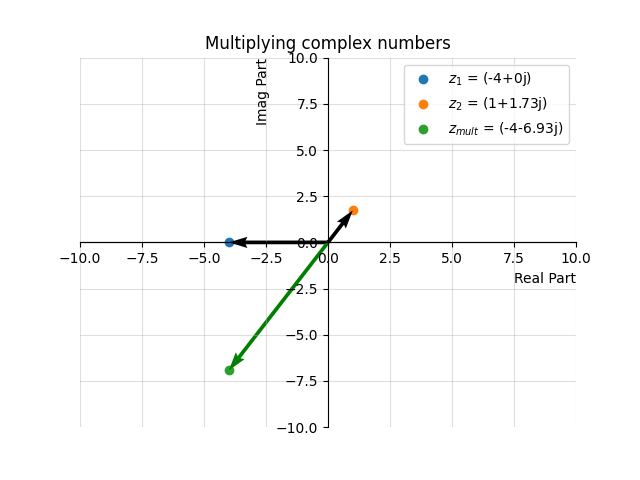

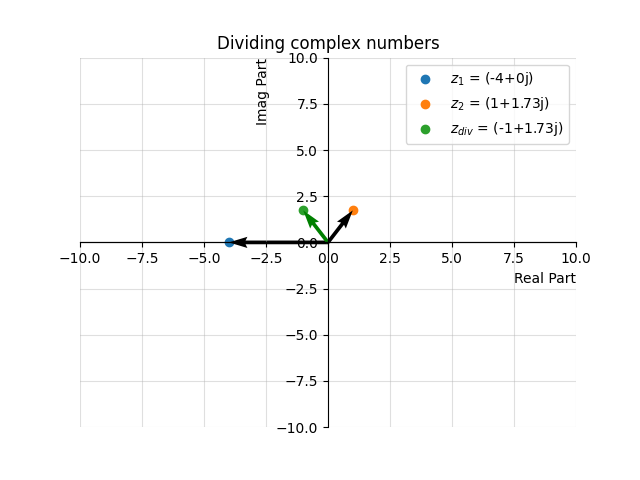

In [10]:
# define the modulus and angle of the complex numbers
r1 = 4; theta1 = np.pi
r2 = 2; theta2 = np.pi/3

# use exponential form of complex numbers
z1 = r1*np.exp(1j*theta1)
z2 = r2*np.exp(1j*theta2)

# multiply and divide
z_mult = z1*z2
z_div = z1/z2

fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.scatter(z1.real, z1.imag,label="$z_1$ = "+str(np.round(z1,decimals=2))) # this command makes a scatter plot of x and y values
ax.quiver(z1.real, z1.imag, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)

ax.scatter(z2.real, z2.imag,label="$z_2$ = "+str(np.round(z2,decimals=2))) # this command makes a scatter plot of x and y values
ax.quiver(z2.real, z2.imag, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)

ax.scatter(z_mult.real, z_mult.imag,label="$z_{mult}$ = "+str(np.round(z_mult,decimals=2))) # this command makes a scatter plot of x and y values
ax.quiver(z_mult.real, z_mult.imag, angles='xy', scale_units='xy',scale=1, color='green') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)

ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')
ax.set_title('Multiplying complex numbers')
ax.legend()

# These commands are just decorations on the plot 
ax.set_xlim([-10, 10]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-10, 10])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')




fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.scatter(z1.real, z1.imag,label="$z_1$ = "+str(np.round(z1,decimals=2))) # this command makes a scatter plot of x and y values
ax.quiver(z1.real, z1.imag, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)

ax.scatter(z2.real, z2.imag,label="$z_2$ = "+str(np.round(z2,decimals=2))) # this command makes a scatter plot of x and y values
ax.quiver(z2.real, z2.imag, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)

ax.scatter(z_div.real, z_div.imag,label="$z_{div}$ = "+str(np.round(z_div,decimals=2))) # this command makes a scatter plot of x and y values
ax.quiver(z_div.real, z_div.imag, angles='xy', scale_units='xy',scale=1, color='green') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)

ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')
ax.set_title('Dividing complex numbers')
ax.legend()

# These commands are just decorations on the plot 
ax.set_xlim([-10, 10]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-10, 10])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')



## Final thoughts

Alright, we've gone through much of the basics of complex numbers here. The idea of this notebook was really for you to take complex numbers into your own hands so that you can manipulate and visualize them. Hopefully this provides a bit more intuition and understanding of complex numbers. It is really essential that you grasp the concepts early on because we will be using them all the time as the module progresses! Up next we will look at phasors and see how this allows us to interpret adding sinusoidal signals. 

For any questions or errors you may have encountered in the notebook, please write to me!